In [81]:
import pandas as pd
import numpy as np

# Basic modules for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#blog on instacart data analysis
#https://docs.google.com/document/d/1HDjpYei59M18kSTZQzXmCCoW8qraeCISJtQv1166-DM/edit#

In [82]:
# Load data into a pandas DataFrame from given filepath
datafile = './instacart_shopper_and Door-dash data - instacart order data.csv'

shopping = pd.read_csv(datafile, parse_dates=[0])
shopping.columns

Index([u'date', u'store_name', u'order_type', u'batch_accept_time',
       u'store_reach_time', u'instacart_pay_amount', u'tip_amount',
       u'num_orders', u'drive_distance', u'num_items', u'shopping_speed',
       u'checkout_speed', u'dropoff_time_A', u'dropoff_time_B',
       u'dropoff_time_C', u'heavy_pay', u'peak_boost', u'comments'],
      dtype='object')

In [83]:
shopping['date'].dtype

dtype('<M8[ns]')

In [84]:
shopping.head()

,date,store_name,order_type,batch_accept_time,store_reach_time,instacart_pay_amount,tip_amount,num_orders,drive_distance,num_items,shopping_speed,checkout_speed,dropoff_time_A,dropoff_time_B,dropoff_time_C,heavy_pay,peak_boost,comments
0,2020-06-22,Food Bazaar,full service,8:38 AM,8:58 AM,19.12,6.28,1,1.2,19/26,NaN,NaN,10:50 AM,NaN,NaN,NaN,NaN,NaN
1,2020-06-22,Aldi,full service,11:09 AM,11:46 AM,19.50,0.00,1,5.7,14/28,NaN,NaN,1:00 PM,NaN,NaN,NaN,2.0,NaN
2,2020-06-23,Aldi,full service,9:00 AM,9:18 AM,19.76,3.82,1,10.2,12/38,NaN,NaN,10:56 AM,NaN,NaN,NaN,NaN,NaN
3,2020-06-23,Food Universe,full service,11:53 AM,12:14 PM,24.35,5.92,1,0.9,29/30,NaN,NaN,2:27 PM,NaN,NaN,NaN,NaN,NaN
4,2020-06-24,Costco,full service,9:55 AM,10:22 AM,11.11,3.06,1,1.0,6/6,NaN,NaN,11:51 AM,NaN,NaN,NaN,NaN,NaN


In [85]:
shopping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 18 columns):
date                    197 non-null datetime64[ns]
store_name              197 non-null object
order_type              197 non-null object
batch_accept_time       197 non-null object
store_reach_time        197 non-null object
instacart_pay_amount    197 non-null float64
tip_amount              197 non-null float64
num_orders              197 non-null int64
drive_distance          197 non-null float64
num_items               197 non-null object
shopping_speed          102 non-null object
checkout_speed          102 non-null object
dropoff_time_A          197 non-null object
dropoff_time_B          83 non-null object
dropoff_time_C          8 non-null object
heavy_pay               20 non-null object
peak_boost              77 non-null float64
comments                70 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object(12)
memory usage: 27.8+ KB


## Numerical attributes

In [86]:
shopping.select_dtypes(exclude=['object']).columns

Index([u'date', u'instacart_pay_amount', u'tip_amount', u'num_orders',
       u'drive_distance', u'peak_boost'],
      dtype='object')

## Explore Numerical Attributes

In [87]:
# Descriptive statistics summary
shopping['instacart_pay_amount'].describe()

count    197.000000
mean      21.504924
std        9.375096
min        5.970000
25%       14.860000
50%       19.540000
75%       27.040000
max       64.600000
Name: instacart_pay_amount, dtype: float64

## Moving averages of instacart_pay_amount

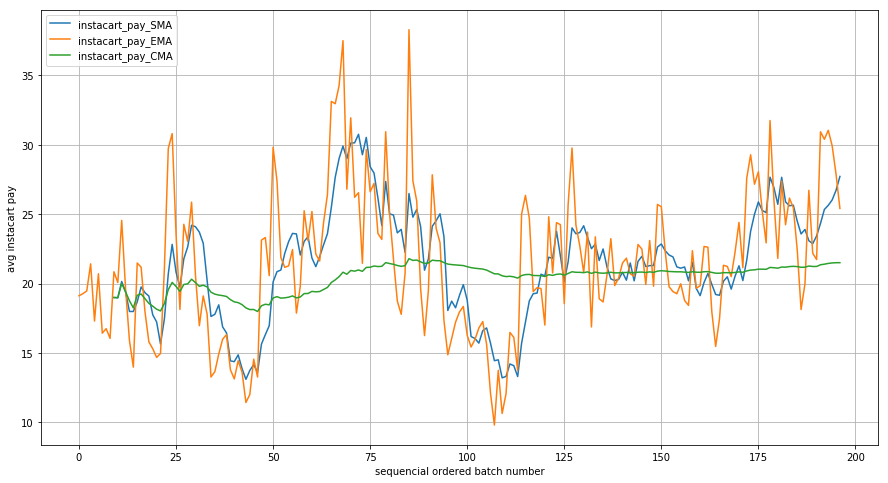

In [88]:
shopping['SMA_10'] = shopping.iloc[:,5].rolling(window=10).mean() #simple moving avg with window size 10.
#instacart_pay_amount is on column index 5
shopping['CMA_10'] = shopping['instacart_pay_amount'].expanding(min_periods=10).mean() #cumulative moving average
shopping['EMA'] = shopping['instacart_pay_amount'].ewm(alpha=0.4,adjust=False).mean()

plt.figure(figsize=[15,8])
plt.grid(True)
plt.xlabel("sequencial ordered batch number")
plt.ylabel("avg instacart pay")
#plt.plot(shopping['instacart_pay_amount'],label='instacart_pay')
plt.plot(shopping['SMA_10'],label='instacart_pay_SMA')
plt.plot(shopping['EMA'],label='instacart_pay_EMA')
plt.plot(shopping['CMA_10'],label='instacart_pay_CMA')
plt.legend(loc=2)


 per order instacart_earning measurement via Simple moving avg (SMA), Cumulative moving avg(CMA), Exponential Moving avg(EMA).
 
 From the plot we see that, SMA fluctuates less after 130 batches. CMA is less susceptible to new datapoint after 120 batches. EMA follows the trend of SMA.

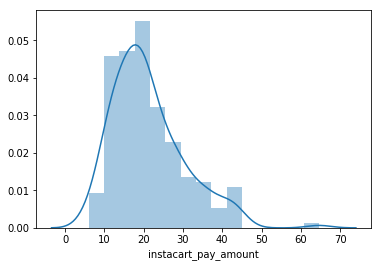

In [40]:
sns.distplot(shopping['instacart_pay_amount'])

In [89]:
shopping['tip_amount'].describe()

count    197.000000
mean       7.451371
std        5.042010
min        0.000000
25%        3.650000
50%        6.480000
75%       10.000000
max       25.440000
Name: tip_amount, dtype: float64

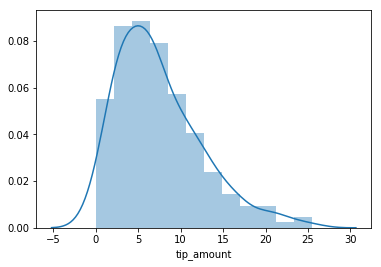

In [90]:
sns.distplot(shopping['tip_amount'])

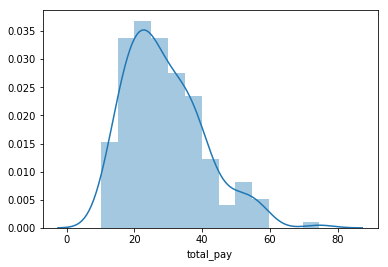

In [91]:
shopping['total_pay'] = shopping.apply(lambda row: row.instacart_pay_amount + row.tip_amount, axis=1)
sns.distplot(shopping['total_pay'])

## Stacked Plot of instacart_pay with tip as percentage

<Figure size 4500x3000 with 0 Axes>

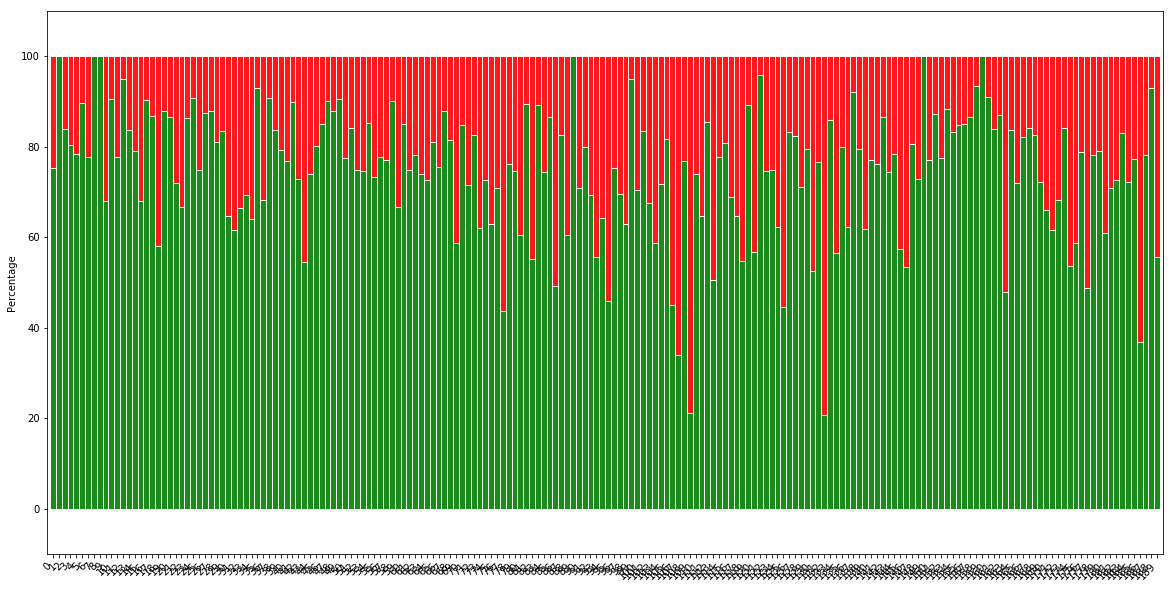

In [44]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 20), dpi=150, facecolor='w', edgecolor='k')

# Heights of bars1 + bars2
bars = np.add(shopping['instacart_pay_amount'], shopping['tip_amount']).tolist()
 
# The position of the bars on the x-axis
r = [i for i in range(1, shopping.shape[0]+1)]
 
# Names of group and bar width
names = range(1, shopping.shape[0]+1)
barWidth = 0.8
 
# Create brown bars
#plt.bar(r, shopping['instacart_pay_amount'], color='green', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
#plt.bar(r, shopping['tip_amount'], bottom=shopping['instacart_pay_amount'], color='red', edgecolor='white', width=barWidth)
 
# Custom X axis
#plt.xticks(r, names)
#plt.xlabel("customer order")
 
# Show graphic
#plt.show()


##stack plot as percentage

# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(20,10))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(shopping['instacart_pay_amount']))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score for each participant
totals = [i+j for i,j in zip(shopping['instacart_pay_amount'], shopping['tip_amount'])]

# Create the percentage of the total score the pre_score value for each participant was
instacart_percent = [i / j * 100 for  i,j in zip(shopping['instacart_pay_amount'], totals)]

# Create the percentage of the total score the mid_score value for each participant was
tip_percent = [i / j * 100 for  i,j in zip(shopping['tip_amount'], totals)]

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using pre_rel data
       instacart_percent, 
       # labeled 
       label='instacart_percentage', 
       # with alpha
       alpha=0.9, 
       # with color
       color='green',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using mid_rel data
       tip_percent, 
       # with pre_rel
       bottom=instacart_percent, 
       # labeled 
       label='Instacart_percentage', 
       # with alpha
       alpha=0.9, 
       # with color
       color='red', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Set the ticks to be first names
plt.xticks(tick_pos, bar_l)
ax.set_ylabel("Percentage")
ax.set_xlabel("")

# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

# shot plot
plt.show()

## analysis on stores where I shopped

In [92]:
shopping.groupby(['store_name']).groups.keys()

['Ideal Food Basket',
 'Brooklyn Harvest',
 'Target',
 'Key Food Marketplace',
 'Key Food Urban Marketplace',
 'GW Supermarket',
 'Food Bazaar',
 'Wegmans',
 "BJ's Wholesale Club",
 'Bed Bath & Beyond',
 'Restaurant Depot',
 'Food Universe',
 'Key Food',
 'SuperFresh',
 'Aldi',
 'Foodtown',
 'CVS Pharmacy',
 'ShopRite',
 'Costco',
 'Stop & Shop',
 'Rite Aid Pharmacy']

In [93]:
#number of times shopped at each store
shopping.groupby('store_name')['date'].count().sort_values(ascending=False)

store_name
Costco                        62
Aldi                          47
BJ's Wholesale Club           36
Food Universe                 13
Food Bazaar                    7
Wegmans                        7
Restaurant Depot               5
Key Food Marketplace           3
GW Supermarket                 3
Target                         2
Stop & Shop                    2
Key Food Urban Marketplace     1
Key Food                       1
Foodtown                       1
Rite Aid Pharmacy              1
ShopRite                       1
CVS Pharmacy                   1
Brooklyn Harvest               1
Bed Bath & Beyond              1
SuperFresh                     1
Ideal Food Basket              1
Name: date, dtype: int64

In [94]:
#group by both store and order type (full service or delivery only)
shopping.groupby(['store_name', 'order_type'])['date'].count()#.sort_values(ascending=False)

store_name                  order_type   
Aldi                        delivery only     4
                            full service     43
BJ's Wholesale Club         full service     36
Bed Bath & Beyond           full service      1
Brooklyn Harvest            full service      1
CVS Pharmacy                full service      1
Costco                      full service     62
Food Bazaar                 full service      7
Food Universe               delivery only     7
                            full service      6
Foodtown                    full service      1
GW Supermarket              full service      3
Ideal Food Basket           full service      1
Key Food                    full service      1
Key Food Marketplace        full service      3
Key Food Urban Marketplace  full service      1
Restaurant Depot            full service      5
Rite Aid Pharmacy           full service      1
ShopRite                    full service      1
Stop & Shop                 full service      

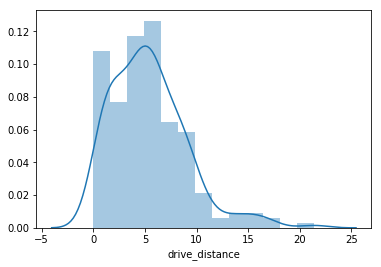

In [95]:
sns.distplot(shopping['drive_distance'])

## Looking for Outliers

Index([u'date', u'instacart_pay_amount', u'tip_amount', u'num_orders',
       u'drive_distance', u'peak_boost', u'SMA_10', u'CMA_10', u'EMA',
       u'total_pay'],
      dtype='object')


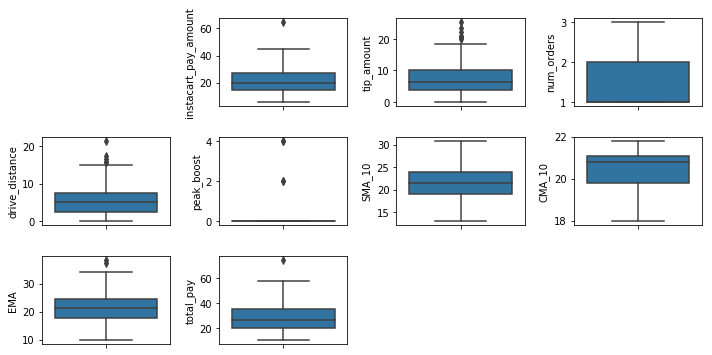

In [96]:
num_attributes = shopping.select_dtypes(exclude='object').copy()
fig = plt.figure(figsize=(10, 15))
print num_attributes.columns

for i in range(len(num_attributes.columns)):
    if num_attributes.columns[i] == 'date':
        continue
    fig.add_subplot(9, 4, i+1)
    sns.boxplot(y=num_attributes.iloc[:,i])

plt.tight_layout()
plt.show()

From the box plots of instacart_pay_amount and total_pay, customer's tip has made the median total_pay pass over 20$.

## predict instacart payment of a batch using linear regression based on multiple features such as order_type, store, num_orders, num_items etc

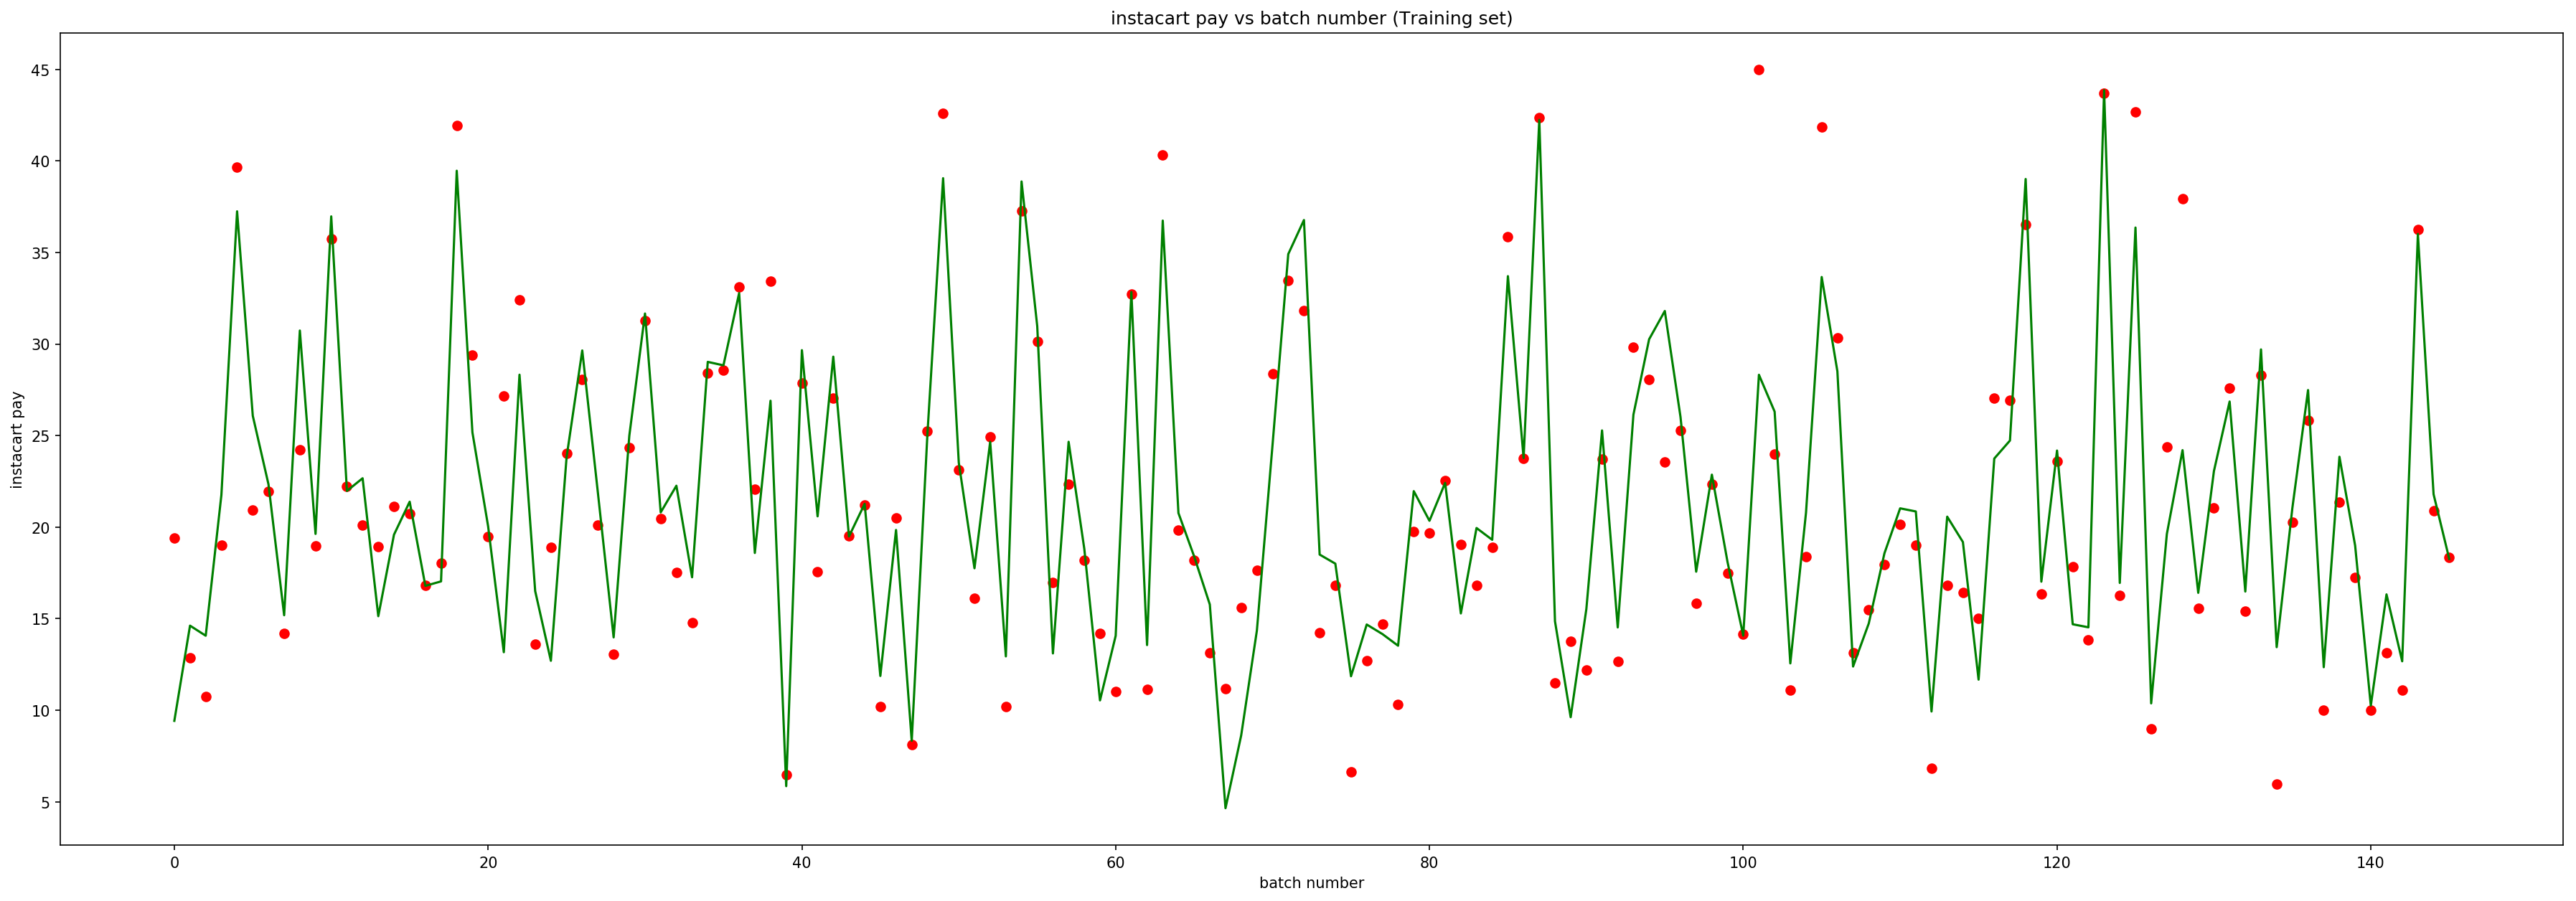

Mean squared error: 12.37
Coefficient of determination: 0.90


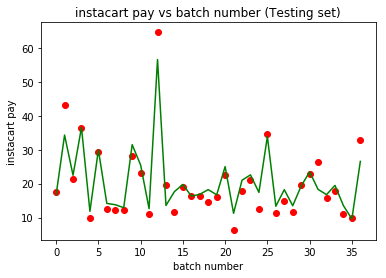

In [137]:
def item_function(item_col):
    #print type(item_col)
    item_col = str(item_col)
    if "bag" in item_col:
        return int(item_col[0:item_col.index('bag')-1])
    else:
        return int(item_col.split('/')[0])

def heavy_pay_func(cell):
    #print type(cell)
    if not cell:
        return 0
    cell = str(cell)
    if len(cell) <= 1:
        return 0
    if 'yes' in cell:
        return 1
    return 0
        
shopping = pd.read_csv(datafile,  parse_dates=[0])

figure(num=None, figsize=(30, 10), dpi=150, facecolor='w', edgecolor='k')

shopping['num_items'] = shopping['num_items'].apply(item_function)
shopping['heavy_pay'] = shopping['heavy_pay'].apply(heavy_pay_func)
shopping['order_type'] = shopping['order_type'].apply(lambda x: 1 if 'full service' in x else 0)

x = shopping[["order_type", "num_orders", 'drive_distance', 'num_items', 'heavy_pay']]
y = shopping[['instacart_pay_amount']]


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1.0/5)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

#training set
plt.scatter(range(len(x_train)), y_train, color = "red")
plt.plot(range(len(x_train)), lr.predict(x_train), color = "green")
plt.title("instacart pay vs batch number (Training set)")
plt.xlabel("batch number")
plt.ylabel("instacart pay")
plt.show()

from sklearn.metrics import mean_squared_error, r2_score

print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

#test set
plt.scatter(range(len(x_test)), y_test, color = "red")
plt.plot(range(len(x_test)), y_pred, color = "green")
plt.title("instacart pay vs batch number (Testing set)")
plt.xlabel("batch number")
plt.ylabel("instacart pay")
plt.show()

## same linear regression with extra feature of num of units along with num_items

183 183


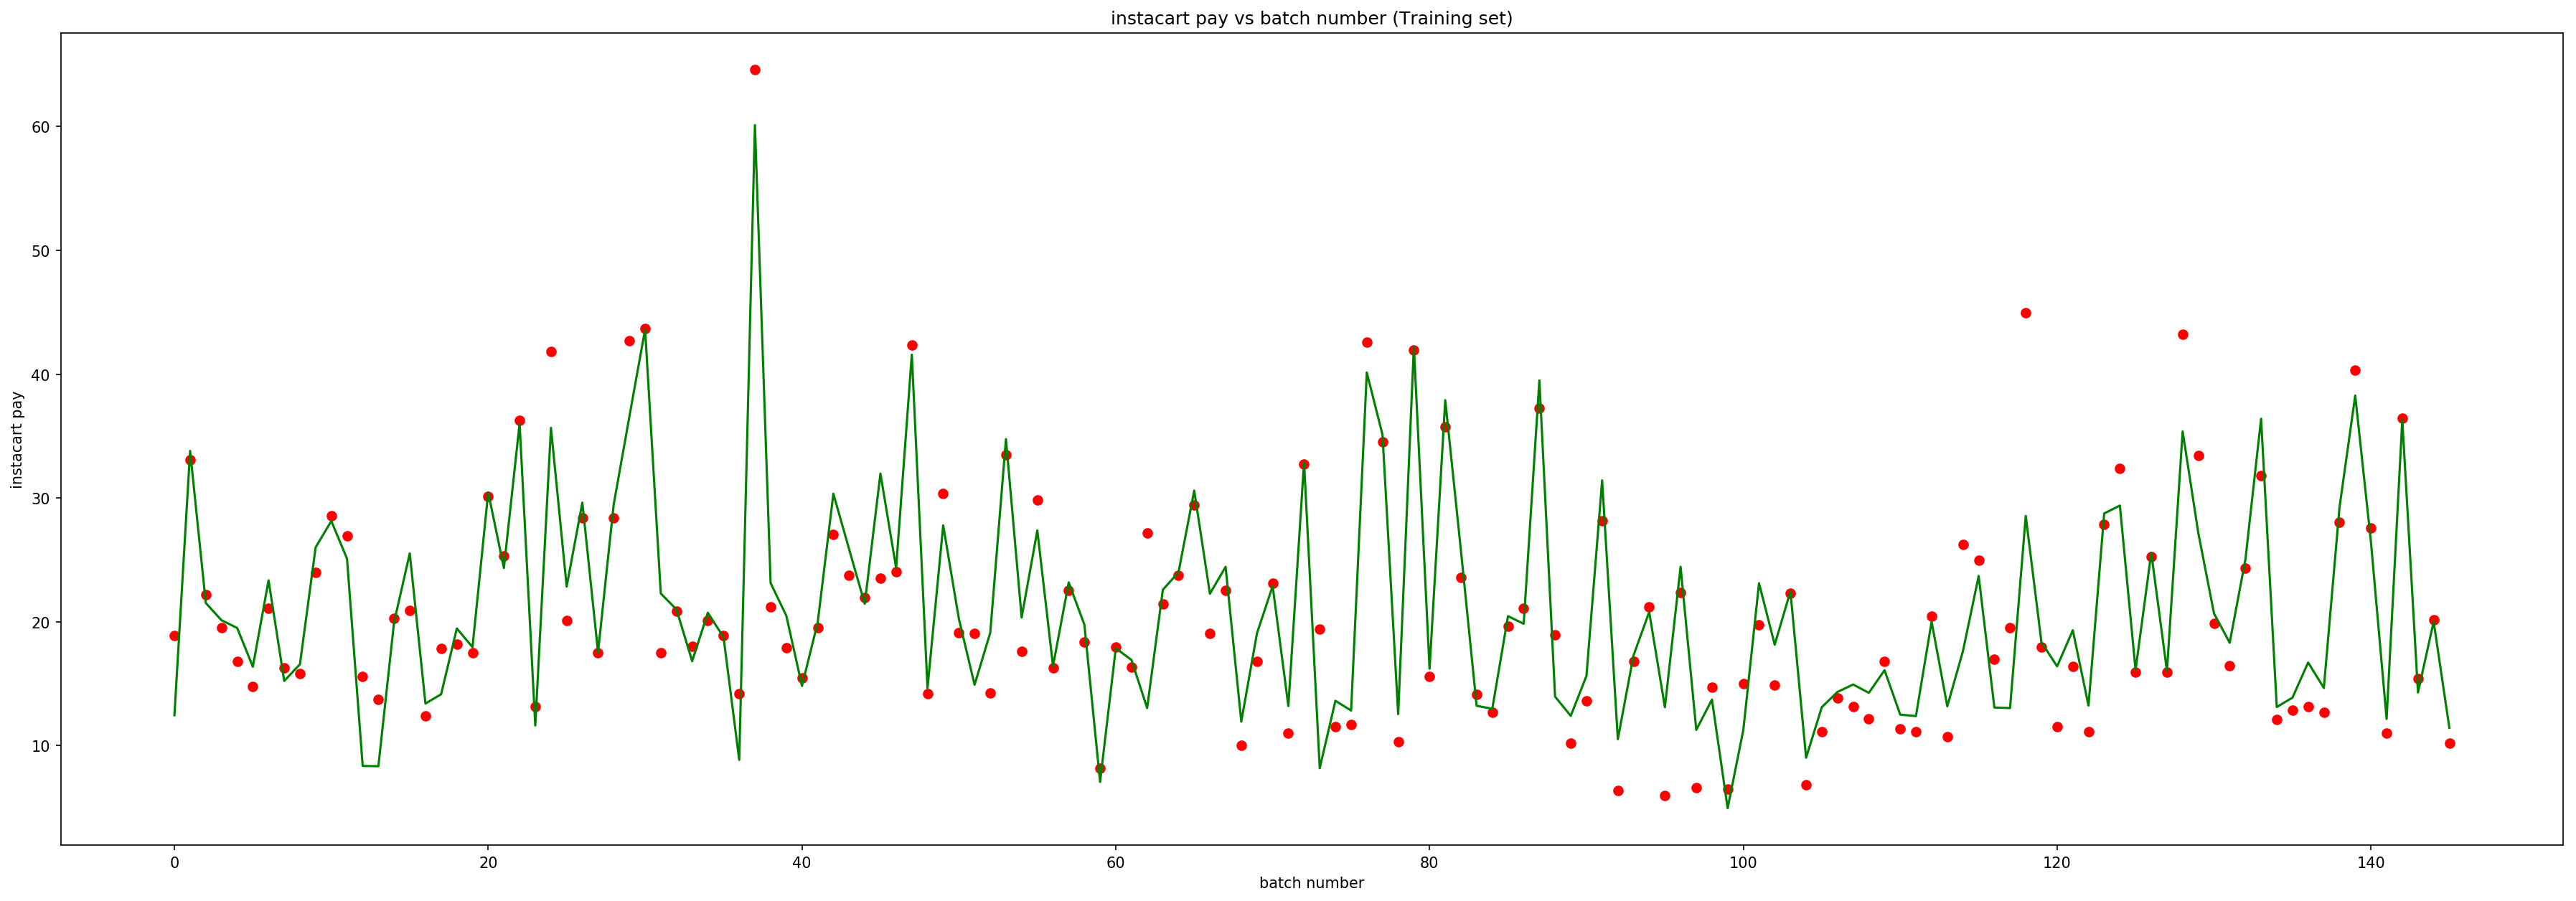

Mean squared error: 15.27
Coefficient of determination: 0.79


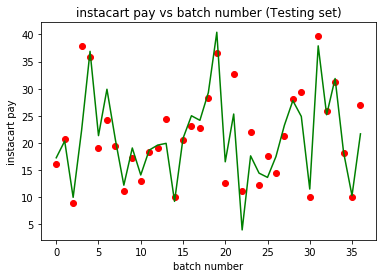

,order_type,instacart_pay_amount,tip_amount,num_orders,drive_distance,heavy_pay,peak_boost,num_item,num_units
order_type,1.000000,0.322443,-0.132882,-0.259864,-0.144995,0.027320,0.038068,0.180080,0.220939
instacart_pay_amount,0.322443,1.000000,0.206337,0.301268,0.334170,0.311119,-0.110845,0.820217,0.797694
tip_amount,-0.132882,0.206337,1.000000,0.469365,0.128581,0.109207,-0.206280,0.242207,0.183063
num_orders,-0.259864,0.301268,0.469365,1.000000,0.471580,0.259864,-0.171304,0.188870,0.140944
drive_distance,-0.144995,0.334170,0.128581,0.471580,1.000000,0.182085,-0.130130,0.065310,0.046259
heavy_pay,0.027320,0.311119,0.109207,0.259864,0.182085,1.000000,-0.054741,0.028655,0.041055
peak_boost,0.038068,-0.110845,-0.206280,-0.171304,-0.130130,-0.054741,1.000000,-0.183923,-0.159068
num_item,0.180080,0.820217,0.242207,0.188870,0.065310,0.028655,-0.183923,1.000000,0.933908
num_units,0.220939,0.797694,0.183063,0.140944,0.046259,0.041055,-0.159068,0.933908,1.000000


In [138]:
def item_function2(item_col):
    #print type(item_col)
    item_col = str(item_col)
    if "bag" in item_col:
        return int(item_col[0:item_col.index('bag')-1])
    else:
        return int(item_col.split('/')[1])
        
shopping = pd.read_csv(datafile,  parse_dates=[0])

figure(num=None, figsize=(30, 10), dpi=150, facecolor='w', edgecolor='k')

shopping['num_item'] = shopping['num_items'].apply(item_function)
shopping['num_units'] = shopping['num_items'].apply(item_function2) #extra feature
shopping['heavy_pay'] = shopping['heavy_pay'].apply(heavy_pay_func)
shopping['order_type'] = shopping['order_type'].apply(lambda x: 1 if 'full service' in x else 0)

x = shopping[["order_type", "num_orders", 'drive_distance', 'num_item','num_units', 'heavy_pay']]
y = shopping[['instacart_pay_amount']]

print len(x), len(y)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1.0/5)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

#training set
plt.scatter(range(len(x_train)), y_train, color = "red")
plt.plot(range(len(x_train)), lr.predict(x_train), color = "green")
plt.title("instacart pay vs batch number (Training set)")
plt.xlabel("batch number")
plt.ylabel("instacart pay")
plt.show()

from sklearn.metrics import mean_squared_error, r2_score

print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

#test set
plt.scatter(range(len(x_test)), y_test, color = "red")
plt.plot(range(len(x_test)), y_pred, color = "green")
plt.title("instacart pay vs batch number (Testing set)")
plt.xlabel("batch number")
plt.ylabel("instacart pay")
plt.show()
## correlation among variables
#shopping.corr()

Adding num_units feature decreases MSE and increases coeff of determination.

## Per day income calculate

96


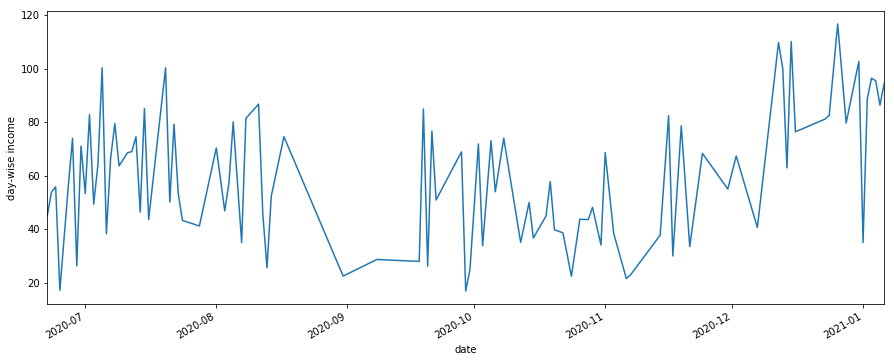

In [101]:
perday_income = shopping.groupby(['date'])['total_pay'].sum() #total_pay is the column for sum of instacart pay and tip
print len(perday_income) #How many days I have worked
#type(perday_income) - series
plt.figure(figsize=[15,6])
plt.grid(True)
plt.gca().yaxis.grid(True)
perday_income.plot()
plt.ylabel('day-wise income')

perday_income = perday_income.to_frame()
perday_income['datetmp'] = perday_income.index

plt.show()
#print (perday_income)


#print(perday_income['total_pay'])

From the plot above, we can see that there are three days when income exceeded 100$. In the month of August, I didn't do instacart that much due to Amazon interview which is evident from the plot.

## time series analysis of hours taken to deliver a batch (batch accept time to last order delivery time)

3948.94736842 1991.268382
3888.0 1541.81164312


,total_pay,total_time
total_pay,1.000000,0.837745
total_time,0.837745,1.000000


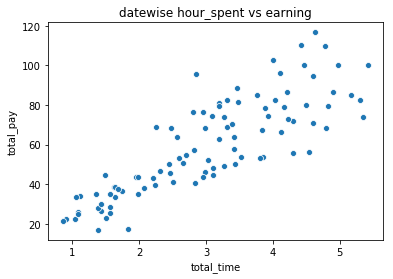

In [102]:
#df.apply(np.sum, axis=1)
from datetime import datetime
from datetime import timedelta
def timediff(t1, t2):
    FMT = '%H:%M %p'
    tdelta = datetime.strptime(t2, FMT) - datetime.strptime(t1, FMT)
    #print tdelta
    if tdelta.days < 0:
        tdelta = timedelta(days=0,seconds=tdelta.seconds, microseconds=tdelta.microseconds)
    #print tdelta, tdelta.seconds
    twelvehours = 12*60*60
    if tdelta.seconds > twelvehours:
        return tdelta.seconds -twelvehours
    return tdelta.seconds
    #return int (tdelta.strftime("%s"))
    
def batchtime_function(row):
    if row['num_orders'] == 1:
        return timediff(row['store_reach_time'], row['dropoff_time_A'])/row['num_orders']
    elif row['num_orders'] == 2:
        return timediff(row['store_reach_time'], row['dropoff_time_B'])/row['num_orders']
    else:
        return timediff(row['store_reach_time'], row['dropoff_time_C'])/row['num_orders']

def totaltime_function(row):
    if row['num_orders'] == 1:
        return timediff(row['store_reach_time'], row['dropoff_time_A'])*1.0/3600
    elif row['num_orders'] == 2:
        return timediff(row['store_reach_time'], row['dropoff_time_B'])*1.0/3600
    else:
        return timediff(row['store_reach_time'], row['dropoff_time_C'])*1.0/3600
        
    
shopping['batch_time'] = shopping.apply(batchtime_function, axis=1) #in seconds
shopping['total_time'] = shopping.apply(totaltime_function, axis=1) #in hours

def isMorning_batch(row):
    s = row['store_reach_time'].split(' ')
    if s[1] == 'AM':
        return True
    else:
        return False

#shopping['batch_time'].plot()



m = shopping.apply(isMorning_batch, axis=1)

morning_batch = shopping[m] #batches that started before 12pm

print np.mean(morning_batch['batch_time']), np.std(morning_batch['batch_time'])

evening_batch = shopping[~m] #batches that started after 12pm

print np.mean(evening_batch['batch_time']), np.std(evening_batch['batch_time'])
#print shopping['batch_time']

perday_hours_spent = shopping.groupby(['date'])['total_time'].sum()

perday_hours_spent = perday_hours_spent.to_frame() #converting to dataframe
perday_hours_spent['datetmp'] = perday_hours_spent.index

#print(perday_hours_spent['total_time'])


merged_daywisedata = pd.merge(left=perday_income, right=perday_hours_spent, left_on='datetmp', right_on='datetmp')

merged_daywisedata.head()

plt.title('datewise hour_spent vs earning')

sns.scatterplot(data=merged_daywisedata, x="total_time", y="total_pay")

#The plot shows a trend that more hours spent per day corresponds to more pay. But we also see data points that are aberrant
#This aberration could be due to various factors such as traffic jam,  long checkout queue, difficulty finding customer's home, heavy order, incliment weather etc

merged_daywisedata.corr(method ='pearson')


morning batches has higher variance of batch_time than evening batches although both type of batches have nearly same mean. It means that morning batches have got some batches with very shorter batch time

## Regarding total_time vs total_pay plot

pearson correlation coefficient between total_time and total_pay is 0.85, meaning large positive relationship. In general when hours_spent <= 1 hour, earning is around 20, when hours_spent >= 5 hours, earning is >=100


In [69]:
##trendline
import seaborn as sns

def plot_graph(store, order_type, shopping):
    #print shopping.head()
    #print shopping.loc[shopping['store_name'] == store]
    #
    shopping_1 = shopping.loc[(shopping['store_name'] == store) & (shopping['order_type'] == order_type)]
    #shopping_1.head()
    sns.regplot(x=shopping_1.index.values,y=shopping_1['batch_time'], order=2, color='b').set(title=store + ' batch time')
    #ax2 = plt.twinx()
    #sns.lineplot(data=df.column2, color="b", ax=ax2)
    #sns.regplot(x=shopping_1.index.values,y=shopping_1['batch_time'], order=2, color='g', ax=ax2)
    
plot_graph('Aldi', 1, shopping)
#plot_graph('BJ\'s Wholesale Club', 1, shopping) #1 param is for 'full service' order
#plot_graph('Aldi', 1, shopping)

ValueError: zero-size array to reduction operation minimum which has no identity

Over the whole period of instacart shopping experience, batch time is having downward slope meaning taking less time to complete a batch

## Creating lag plots of batch time

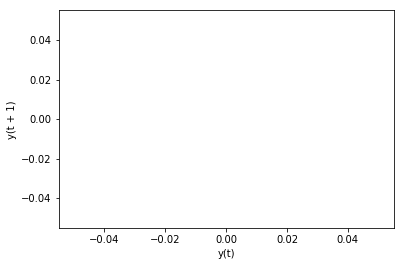

In [70]:
#shopping['lag'] = shopping['batch_time'].shift(1)
#sns.scatterplot(x=shopping['lag'],  y=shopping['batch_time'])

from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot

def lag_plot_func(order_type, shopping):
    shopping_1 = shopping.loc[(shopping['order_type'] == order_type)]
    lag_plot(shopping_1['batch_time'])
    
lag_plot_func(1, shopping)

#s = shopping.loc[(shopping['order_type'] == 1)]
#sns.regplot(x=s['batch_time'][0:len(s['batch_time'])-1],y=s['batch_time'][1:len(s['batch_time'])], order=1, color='g').set(title='reg plot of lag')


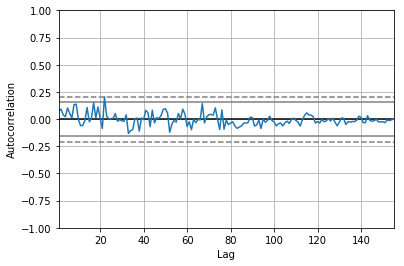

In [24]:
def autocorrelation_plot_func(order_type, shopping):
    shopping_1 = shopping.loc[(shopping['order_type'] == order_type)]
    autocorrelation_plot(shopping_1['batch_time'])
autocorrelation_plot_func(1, shopping)

## Shopping speed plot

## Feature engineering for time series analysis

In [25]:
shopping = pd.read_csv('./instacart_shopper_data - orders_data.csv',  parse_dates=[0])

shopping['date'].dtype
shopping['year'] = shopping['date'].dt.year
#https://www.kaggle.com/shadekur/timeseries-multivariate/edit
#https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/